Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [294]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - no GM1

name = '_DPPC_DIPC_chol_352'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/sans_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/5_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

In [295]:
# name and files for the simulation studied LPT - 10% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/10_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1.xtc'

Load xtc and gro files using mda.Universe('struct file','traj file')

In [296]:
u = mda.Universe( path+fgro, path+fxtc)

In [297]:
sel_all = u.select_atoms("all and (name PO4 or name GM5)")

In [298]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [542]:
# TAKE THE LAST FRAME
frame = 9590
u.trajectory[frame]

< Timestep 9590 with unit cell dimensions [429.38354 429.38354 203.22208  90.       90.       90.     ] >

In [543]:
# set the x and y min and max values

sel_all = "all and (name PO4 or name GM1)"
patch = u.select_atoms(sel_all).positions
print(patch)

xmax = max(patch[:,0])
ymax = max(patch[:,1])
#dmax = int(min(xmax,ymax))
print(xmax)
print(ymax)

xmin = min(patch[:,0])
ymin = min(patch[:,1])

print(xmin)
print(ymin)

[[ 42.3      267.27002   61.7     ]
 [405.76     330.54      80.8     ]
 [ 82.14001   17.730001  78.28001 ]
 ...
 [246.14     359.53003   65.01    ]
 [351.33002  359.96002   50.820004]
 [220.03     283.86002   42.4     ]]
429.34003
429.29
0.13
0.15


In [544]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5272
number of lipids in the upper leaflet: 2676 + number of lipids in the lower leaflet:2596 
= 5272


In [545]:
# TAKE THE LAST FRAME

u.trajectory[frame]

< Timestep 9590 with unit cell dimensions [429.38354 429.38354 203.22208  90.       90.       90.     ] >

In [546]:
sel_Lo = "all and (name PO4 and resname DPPC)"
M_Lo = leaflet1.select_atoms(sel_Lo).positions
for i in range(len(M_Lo)):
    M_Lo[i,2] = 1

sel_Ld = "all and (name PO4 and resname DIPC)"
M_Ld = leaflet1.select_atoms(sel_Ld).positions
for i in range(len(M_Ld)):
    M_Ld[i,2] = 0
    
M_coords = np.concatenate((M_Lo, M_Ld), axis = 0)
print(M_coords)

[[243.87001  342.10004    1.      ]
 [152.44      67.93       1.      ]
 [275.86002  327.29       1.      ]
 ...
 [ 22.45      89.87       0.      ]
 [174.36002  231.48001    0.      ]
 [151.90001   44.680004   0.      ]]


In [547]:
# set the number of boxes into which will be divided the membrane

N = 15
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N
print(dx)
print(dy)

28.61400146484375
28.609334309895832


(225, 3)


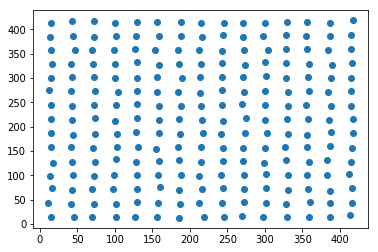

In [548]:
# leaflet 0
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary0 = []
#del Mphi0

Mphi0_Lo = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b0=leaflet0.select_atoms(sel).centroid().tolist()
        bary0.append(b0)
        
        # composition rates in each box      
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot0PC= leaflet0.select_atoms(sel_totPC).positions
        n_tot0PC=len(tot0PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo0= leaflet0.select_atoms(sel_Lo).positions
        n_Lo0=len(Lo0) # number of molecules of the Lo phase (DPPC here)
         
        if  n_tot0PC!=0:
            phi0_Lo=n_Lo0/n_tot0PC
        else :
            print('leaflet 0, empty box: i=%d and j=%d' % (i,j))
        
        Mphi0_Lo[i,j]=phi0_Lo
        
bary0=np.array(bary0)

plt.scatter(bary0[:,0],bary0[:,1])

print(np.shape(bary0))

(225, 3)


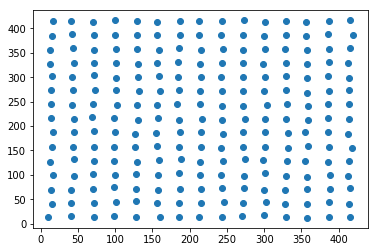

In [549]:
# leaflet 1
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary1 = []
#del Mphi1
Mphi1_Lo = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b1=leaflet1.select_atoms(sel).centroid().tolist()
        bary1.append(b1)
        
        # composition rates in each box
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1PC= leaflet1.select_atoms(sel_totPC).positions
        n_tot1PC=len(tot1PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo1= leaflet1.select_atoms(sel_Lo).positions
        n_Lo1=len(Lo1) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld1= leaflet1.select_atoms(sel_Ld).positions
        n_Ld1=len(Ld1) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_1= leaflet1.select_atoms(sel_GM1).positions
        n_GM1_1=len(GM1_1) # number of GM1 molecules
        
        
        if  n_tot1PC!=0:
            phi1_Lo=n_Lo1/n_tot1PC
        else :
            print('leaflet 1, empty box: i=%d and j=%d' % (i,j))
        
        Mphi1_Lo[i,j]=phi1_Lo
        
bary1=np.array(bary1)

plt.scatter(bary1[:,0],bary1[:,1])

print(np.shape(bary1))

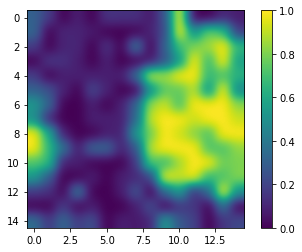

In [550]:
# DPPC / (DPPC+DIPC) leaflet 0
plt.imshow(Mphi0_Lo, interpolation='gaussian')
plt.colorbar()

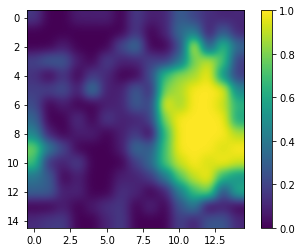

In [551]:
# DPPC / (DPPC+DIPC) leaflet 1
plt.imshow(Mphi1_Lo, interpolation='gaussian')
plt.colorbar()

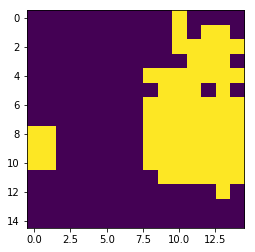

In [552]:
# upper leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi0_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi0_Lo[i,j]>= threshold :
            Mphi0_bin[i,j]=1


#print(Mphi0_bin)          

plt.imshow(Mphi0_bin)

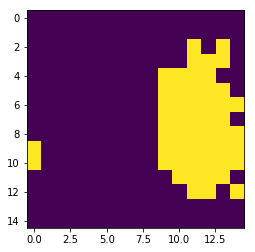

In [553]:
# lower leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi1_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi1_Lo[i,j]>= threshold :
            Mphi1_bin[i,j]=1


#print(Mphi1_bin)          

plt.imshow(Mphi1_bin)

In [560]:
print(Mphi1_bin)
print(np.shape(Mphi1_bin))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(15, 15)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.

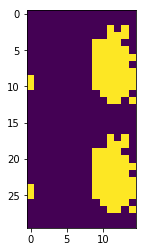

In [561]:
M1 = np.concatenate((Mphi1_bin, Mphi1_bin), axis = 0)
print(M1)
print(np.shape(M1))
plt.imshow(M1)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 

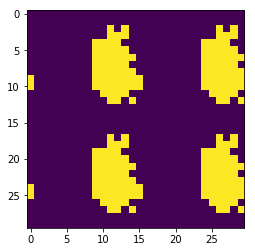

In [562]:
M = np.concatenate((M1, M1), axis = 1)
print(M)
print(np.shape(M))
plt.imshow(M)

sumx = []
for i in range(2*N):
    sumx.append(int(sum(M[i,:])))

maxix = np.argwhere(sumx == np.amax(sumx))
maxix = maxix.flatten().tolist()
print(maxix)

x_bar = 0
for i in range(len(maxix)):
    if maxix[i] in range(10,20,1):
        x_bar = maxix[i]
        break;
        
print(x_bar)    

sumy = []
for i in range(2*N):
    sumy.append(int(sum(M[:,i])))
       
maxiy = np.argwhere(sumy == np.amax(sumy))
maxiy = maxiy.flatten().tolist()
print(maxiy)

y_bar = 0
for i in range(len(maxiy)):
    if maxiy[i] in range(10,20,1):
        y_bar = maxiy[i]
        break;

print(y_bar)

In [557]:
M_sum = np.zeros((2*N,2*N))

for i in range(2*N):
    for j in range(2*N):
        M_sum[i,j] = sum(M[i,:])+sum(M[:,j])
print(M_sum)

[[ 4.  0.  0.  0.  0.  0.  0.  0.  0. 14. 16. 22. 20. 18. 10.  4.  0.  0.
   0.  0.  0.  0.  0.  0. 14. 16. 22. 20. 18. 10.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.  0. 14. 16. 22. 20. 18. 10.  4.  0.  0.
   0.  0.  0.  0.  0.  0. 14. 16. 22. 20. 18. 10.]
 [ 8.  4.  4.  4.  4.  4.  4.  4.  4. 18. 20. 26. 24. 22. 14.  8.  4.  4.
   4.  4.  4.  4.  4.  4. 18. 20. 26. 24. 22. 14.]
 [10.  6.  6.  6.  6.  6.  6.  6.  6. 20. 22. 28. 26. 24. 16. 10.  6.  6.
   6.  6.  6.  6.  6.  6. 20. 22. 28. 26. 24. 16.]
 [12.  8.  8.  8.  8.  8.  8.  8.  8. 22. 24. 30. 28. 26. 18. 12.  8.  8.
   8.  8.  8.  8.  8.  8. 22. 24. 30. 28. 26. 18.]
 [14. 10. 10. 10. 10. 10. 10. 10. 10. 24. 26. 32. 30. 28. 20. 14. 10. 10.
  10. 10. 10. 10. 10. 10. 24. 26. 32. 30. 28. 20.]
 [16. 12. 12. 12. 12. 12. 12. 12. 12. 26. 28. 34. 32. 30. 22. 16. 12. 12.
  12. 12. 12. 12. 12. 12. 26. 28. 34. 32. 30. 22.]
 [14. 10. 10. 10. 10. 10. 10. 10. 10. 24. 26. 32. 30. 28. 20. 14. 10. 10.
  10. 10. 10. 10. 10. 10. 24. 26. 32. 30. 28. 20.]


In [558]:
val_max = 0
x_bar = 0
y_bar = 0
for i in range(2*N):
    for j in range(2*N):
        if M_sum[i,j]>val_max:
            val_max = M_sum[i,j]
            x_bar = i
            y_bar = j
print(x_bar)
print(y_bar)
print(val_max)

9
11
36.0


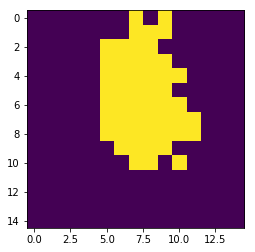

In [559]:
M_center = np.zeros((15,15))

for i in range(x_bar-int(np.floor(N/2)), x_bar+int(np.floor(N/2))+1):

    for j in range(y_bar-int(np.floor(N/2)), y_bar+int(np.floor(N/2))+1):

        M_center[i-(x_bar-int(np.floor(N/2))),j-(y_bar-int(np.floor(N/2)))] = M[i,j]

plt.imshow(M_center)

In [383]:
# for Mphi1_bin => M_center

nb_Lo = int(np.sum(M_center))
print(nb_Lo)

coords_Lo = np.zeros((nb_Lo,2))
l = 0

for i in range(N):
    for j in range(N):
        if M_center[i,j]==1 :
            coords_Lo[l][0]=i
            coords_Lo[l][1]=j
            l += 1
#print(coords_Lo)
box_x_mean = np.mean(coords_Lo[:,0])
box_y_mean = np.mean(coords_Lo[:,1])
print(box_x_mean)
print(box_y_mean)

box_x_max = 0
box_y_max = 0

for i in range(N):
    for j in range(N):
        if M_center[i,j]==1 and np.abs(i-box_x_mean) > box_x_max:
            box_x_max = np.abs(i-box_x_mean)
        if M_center[i,j]==1 and np.abs(j-box_y_mean) > box_y_max:
            box_y_max = np.abs(j-box_y_mean)
print(box_x_max)
print(box_y_max)
box_max = np.ceil(max(box_x_max,box_y_max))
print(box_max)

51
5.588235294117647
6.509803921568627
5.588235294117647
3.5098039215686274
6.0


(2.6401433691756275,
 10.359856630824371,
 -10.515176600441501,
 0.5151766004415013)

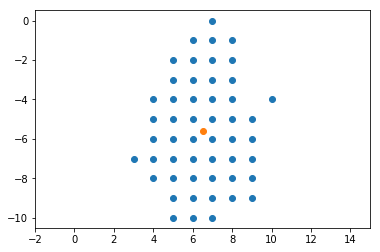

In [384]:
plt.scatter(coords_Lo[:,1], -coords_Lo[:,0])
plt.scatter(box_y_mean, -box_x_mean)
plt.axis('equal')

In [404]:
x_mean = box_x_mean /N * (xmax-xmin)
y_mean = box_y_mean /N * (ymax-ymin)
r_max = box_max /N * (ymax-ymin) *1.2
print(x_mean)
print(y_mean)
print(r_max)

158.65744916130512
184.86542553870507
204.465615234375


In [474]:
x_center = np.floor(N/2)/N * (xmax-xmin)
y_center = np.floor(N/2)/N * (ymax-ymin)

x_cor = x_center - x_mean
y_cor = y_center - y_mean

print(x_cor)
print(y_cor)

41.64056109260113
15.399914630565775


In [496]:
for i in range(len(M_coords)):
    print(M_coords[i]) 

[243.87001 342.10004   1.     ]
[152.44  67.93   1.  ]
[275.86002 327.29      1.     ]
[164.47    354.47003   1.     ]
[332.69 310.35   1.  ]
[316.46002 330.64      1.     ]
[429.25003 157.25      1.     ]
[ 73.72 388.54   1.  ]
[301.78003  14.29      1.     ]
[148.05    384.41003   1.     ]
[174.18001 276.5       1.     ]
[274.83002 364.80005   1.     ]
[ 99.130005 321.74       1.      ]
[320.61002  10.35      1.     ]
[174.26001 255.15001   1.     ]
[284.4         7.9500003   1.       ]
[316.61002 262.50003   1.     ]
[167.91    213.69002   1.     ]
[262.26    328.33002   1.     ]
[226.04002 343.91003   1.     ]
[315.97003 344.54004   1.     ]
[258.96002 350.6       1.     ]
[313.6     378.48004   1.     ]
[293.61002 301.14      1.     ]
[140.87001 288.32      1.     ]
[167.85    358.11002   1.     ]
[304.78    357.72003   1.     ]
[235.45001 302.59      1.     ]
[ 44.120003 333.38       1.      ]
[300.04    363.15002   1.     ]
[323.79    389.53003   1.     ]
[329.84003 381.98      

[182.20001 348.45      1.     ]
[216.08002 311.23      1.     ]
[169.88 126.83   1.  ]
[322.91998 395.49005   1.     ]
[264.23 320.41   1.  ]
[108.5  360.55   1.  ]
[164.27 345.55   1.  ]
[246.87    226.04002   1.     ]
[193.5     422.71002   1.     ]
[198.04001   27.180002   1.      ]
[308.12003 273.49002   1.     ]
[190.05002 290.82      1.     ]
[250.77002 338.77002   1.     ]
[102.090004 344.21002    1.      ]
[251.63002 366.11      1.     ]
[262.43002 424.43      1.     ]
[365.19      37.140003   1.      ]
[154.54001 330.18002   1.     ]
[134.71 338.39   1.  ]
[375.51 306.75   1.  ]
[249.75 406.04   1.  ]
[232.43002 279.97003   1.     ]
[158.05    309.59003   1.     ]
[285.23 268.5    1.  ]
[209.46 285.65   1.  ]
[131.67001 353.20004   1.     ]
[ 76.78001 206.02002   1.     ]
[247.06001 422.16003   1.     ]
[354.91 278.98   1.  ]
[297.98   7.11   1.  ]
[310.17 253.49   1.  ]
[215.42001 319.77002   1.     ]
[151.42001 380.79004   1.     ]
[350.37003   23.160002   1.      ]
[311.530

[165.91002 422.82      0.     ]
[  6.9000006 104.98        0.       ]
[371.35004  79.28001   0.     ]
[423.22003  27.3       0.     ]
[387.96002 250.75      0.     ]
[373.64 410.38   0.  ]
[195.42001  83.61      0.     ]
[123.61001   11.940001   0.      ]
[402.47003 279.71002   0.     ]
[ 34.510002 377.90002    0.      ]
[97.32001 56.9      0.     ]
[388.35004     6.0200005   0.       ]
[208.62001 124.76001   0.     ]
[33.780003 36.22      0.      ]
[216.30002 109.06      0.     ]
[ 98.850006 105.740005   0.      ]
[105.630005 297.50003    0.      ]
[423.22003 389.73004   0.     ]
[197.01001 381.61005   0.     ]
[ 97.57001 133.40001   0.     ]
[107.130005  89.3        0.      ]
[122.240005 204.78       0.      ]
[ 53.08 108.21   0.  ]
[427.78003   49.770004   0.      ]
[ 24.090002 357.88       0.      ]
[328.19 220.17   0.  ]
[349.51    203.29001   0.     ]
[331.82004  99.28001   0.     ]
[ 55.730003 201.1        0.      ]
[287.54    225.49002   0.     ]
[ 89.6  403.38   0.  ]
[11.15 2

In [497]:
for i in range(len(M_coords)):
    M_coords[i,0] = M_coords[i,0] + x_cor
    M_coords[i,1] = M_coords[i,1] + y_cor

In [498]:
print(M_coords)

[[285.51056  357.49994    1.      ]
 [194.08057   83.32992    1.      ]
 [317.50058  342.6899     1.      ]
 ...
 [ 64.09056  105.26992    0.      ]
 [216.00058  246.87993    0.      ]
 [193.54057   60.079918   0.      ]]


In [499]:
nb_r = 8
dr = int(r_max/nb_r)

nb_theta = 12
dtheta = 2*np.pi/nb_theta

In [500]:
# leaflet 1
# divide the leaflet into a pie  and calculate the concentration ratio in each box

x = M_coords[:,0]
y = M_coords[:,1]

x_pie_r = [[] for r in range(nb_r)]
y_pie_r = [[] for r in range(nb_r)]
pie_r = [[] for r in range(nb_r)]

x_pie_theta = [[] for t in range(nb_theta)]
y_pie_theta = [[] for t in range(nb_theta)]
pie_theta = [[] for t in range(nb_theta)]


r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M)):
        xi = M_coords[i,0]
        yi = M_coords[i,1]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)
        
    x_pie_r[r] = x_r
    y_pie_r[r] = y_r
    pie_r[r] = i_r
    
for i in range(len(M)):
    xi = M_coords[i,0]
    yi = M_coords[i,1]
    
    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1
    
    x_pie_theta[t].append(xi)
    y_pie_theta[t].append(yi)
    pie_theta[t].append(i)

(15.827469314671742, 492.66393625469954, -12.85031806494382, 466.4919947440264)

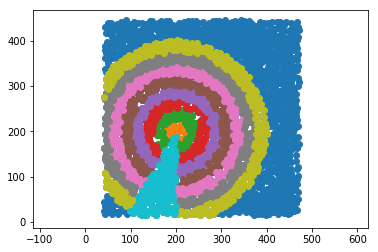

In [501]:
plt.scatter(x,y)

for r in range(nb_r):
    plt.scatter(x_pie_r[r], y_pie_r[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=8;    
plt.scatter(x_pie_theta[t], y_pie_theta[t])    
plt.axis('equal')

In [391]:
# leaflet 1
# divide the leaflet into a pie  and calculate the concentration ratio in each box

sel_tot = "all and (name PO4 and resname DPPC)"
M = leaflet1.select_atoms(sel_tot).positions

x_pie_r_Lo = [[] for r in range(nb_r)]
y_pie_r_Lo = [[] for r in range(nb_r)]
pie_r_Lo = [[] for r in range(nb_r)]

x_pie_theta_Lo = [[] for t in range(nb_theta)]
y_pie_theta_Lo = [[] for t in range(nb_theta)]
pie_theta_Lo = [[] for t in range(nb_theta)]


r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M)):
        xi = M[i,0]
        yi = M[i,1]

        if (xi-x_mean)**2+(yi-y_mean)**2 < r_crown**2 and (xi-x_mean)**2+(yi-y_mean)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)
        
    x_pie_r_Lo[r] = x_r
    y_pie_r_Lo[r] = y_r
    pie_r_Lo[r] = i_r
    
for i in range(len(M)):
    xi = M[i,0]
    yi = M[i,1]
    
    theta = np.arccos((xi-x_mean)/np.sqrt((xi-x_mean)**2+(yi-y_mean)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_mean : # if angle > pi
        t = nb_theta-t-1
    
    x_pie_theta_Lo[t].append(xi)
    y_pie_theta_Lo[t].append(yi)
    pie_theta_Lo[t].append(i)

(-21.261856871992215,
 447.1818617576359,
 -26.219147646035204,
 447.52779013051435)

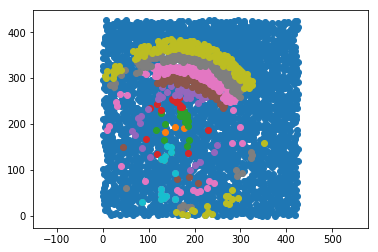

In [392]:
plt.scatter(x,y)

for r in range(nb_r):
    plt.scatter(x_pie_r_Lo[r], y_pie_r_Lo[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=8;    
plt.scatter(x_pie_theta_Lo[t], y_pie_theta_Lo[t])    
plt.axis('equal')

In [393]:
pie = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [394]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r[r])):
                if (pie_r[r][l] in pie_theta[t]):
                    pie[r][t].append(pie_r[r][l])
    

In [395]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie[r][t])) )

r=0 t=0 2
r=0 t=1 1
r=0 t=2 2
r=0 t=3 2
r=0 t=4 0
r=0 t=5 2
r=0 t=6 4
r=0 t=7 1
r=0 t=8 2
r=0 t=9 1
r=0 t=10 2
r=0 t=11 3
r=1 t=0 7
r=1 t=1 8
r=1 t=2 7
r=1 t=3 6
r=1 t=4 7
r=1 t=5 6
r=1 t=6 9
r=1 t=7 7
r=1 t=8 7
r=1 t=9 5
r=1 t=10 7
r=1 t=11 6
r=2 t=0 10
r=2 t=1 10
r=2 t=2 13
r=2 t=3 11
r=2 t=4 13
r=2 t=5 12
r=2 t=6 10
r=2 t=7 7
r=2 t=8 9
r=2 t=9 12
r=2 t=10 11
r=2 t=11 11
r=3 t=0 16
r=3 t=1 18
r=3 t=2 18
r=3 t=3 17
r=3 t=4 14
r=3 t=5 17
r=3 t=6 15
r=3 t=7 14
r=3 t=8 19
r=3 t=9 15
r=3 t=10 16
r=3 t=11 13
r=4 t=0 22
r=4 t=1 23
r=4 t=2 25
r=4 t=3 22
r=4 t=4 20
r=4 t=5 18
r=4 t=6 20
r=4 t=7 21
r=4 t=8 22
r=4 t=9 17
r=4 t=10 18
r=4 t=11 22
r=5 t=0 25
r=5 t=1 35
r=5 t=2 34
r=5 t=3 30
r=5 t=4 23
r=5 t=5 27
r=5 t=6 22
r=5 t=7 24
r=5 t=8 24
r=5 t=9 30
r=5 t=10 21
r=5 t=11 23
r=6 t=0 30
r=6 t=1 40
r=6 t=2 33
r=6 t=3 36
r=6 t=4 29
r=6 t=5 16
r=6 t=6 17
r=6 t=7 26
r=6 t=8 31
r=6 t=9 27
r=6 t=10 29
r=6 t=11 28
r=7 t=0 29
r=7 t=1 43
r=7 t=2 43
r=7 t=3 42
r=7 t=4 34
r=7 t=5 0
r=7 t=6 1
r=7 t=7 32
r=

In [396]:
pie_Lo = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [397]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r_Lo[r])):
                if (pie_r_Lo[r][l] in pie_theta_Lo[t]):
                    pie_Lo[r][t].append(pie_r_Lo[r][l])
    

In [398]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie_Lo[r][t])) )

r=0 t=0 1
r=0 t=1 0
r=0 t=2 0
r=0 t=3 1
r=0 t=4 0
r=0 t=5 0
r=0 t=6 1
r=0 t=7 0
r=0 t=8 0
r=0 t=9 0
r=0 t=10 0
r=0 t=11 0
r=1 t=0 1
r=1 t=1 5
r=1 t=2 4
r=1 t=3 0
r=1 t=4 2
r=1 t=5 1
r=1 t=6 0
r=1 t=7 1
r=1 t=8 3
r=1 t=9 0
r=1 t=10 2
r=1 t=11 0
r=2 t=0 1
r=2 t=1 0
r=2 t=2 5
r=2 t=3 2
r=2 t=4 3
r=2 t=5 0
r=2 t=6 1
r=2 t=7 1
r=2 t=8 3
r=2 t=9 1
r=2 t=10 0
r=2 t=11 0
r=3 t=0 0
r=3 t=1 5
r=3 t=2 14
r=3 t=3 7
r=3 t=4 1
r=3 t=5 3
r=3 t=6 3
r=3 t=7 1
r=3 t=8 1
r=3 t=9 2
r=3 t=10 1
r=3 t=11 2
r=4 t=0 2
r=4 t=1 18
r=4 t=2 24
r=4 t=3 13
r=4 t=4 0
r=4 t=5 0
r=4 t=6 1
r=4 t=7 0
r=4 t=8 0
r=4 t=9 3
r=4 t=10 0
r=4 t=11 0
r=5 t=0 7
r=5 t=1 34
r=5 t=2 33
r=5 t=3 26
r=5 t=4 2
r=5 t=5 4
r=5 t=6 0
r=5 t=7 2
r=5 t=8 5
r=5 t=9 6
r=5 t=10 2
r=5 t=11 2
r=6 t=0 1
r=6 t=1 39
r=6 t=2 32
r=6 t=3 32
r=6 t=4 7
r=6 t=5 0
r=6 t=6 0
r=6 t=7 1
r=6 t=8 2
r=6 t=9 5
r=6 t=10 3
r=6 t=11 3
r=7 t=0 0
r=7 t=1 42
r=7 t=2 42
r=7 t=3 37
r=7 t=4 11
r=7 t=5 0
r=7 t=6 0
r=7 t=7 0
r=7 t=8 0
r=7 t=9 9
r=7 t=10 7
r=7 t=11 1


In [399]:
threshold = 0.6
M_pie_bin = np.zeros((nb_r, nb_theta))

for r in range(nb_r):
    for t in range(nb_theta):
        if(len(pie_Lo[r][t])/len(pie[r][t])>=threshold):
            M_pie_bin[r,t]=1

ZeroDivisionError: division by zero

In [230]:
print(M_pie_bin)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [231]:
boundary = [[],[]]

for t in range(nb_theta):
    
    boundary[0].append(t)
    
    for r in range(1,nb_r-2,1):
        b_found = 0
        if M_pie_bin[r,t]==1 and (M_pie_bin[r+1,t]==0 or r+1>=nb_r) and (M_pie_bin[r+2,t]==0 or r+2>=nb_r):
            b_found = 1
            boundary[1].append(r)
    if b_found == 0:
        if M_pie_bin[nb_r-2,t]==1 and M_pie_bin[nb_r-1,t]!=1:
            boundary[1].append(nb_r-2)
        elif M_pie_bin[nb_r-1,t]==1:
            boundary[1].append(nb_r-1)
                
theta_l = np.array(boundary[0])
r_theta = np.array(boundary[1])
print(theta_l)
print(r_theta)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[5 6 6 5 4 4 5 4 4 3 4 5]


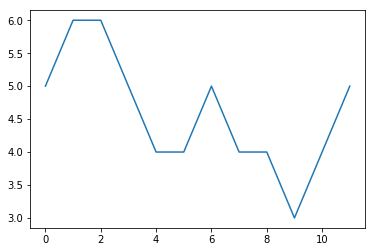

In [232]:
plt.plot(theta_l,r_theta)

In [233]:
r_q = np.fft.rfft(r_theta)
for i in range((len(r_q))):
    print(r_q[i])

(55+0j)
(3.598076211353314-4.232050807568879j)
(2.5000000000000018-2.598076211353316j)
(-2+1j)
(-0.4999999999999989+0.8660254037844395j)
(-1.5980762113533165-0.7679491924311241j)
(1+0j)


In [234]:
r_q_pow = abs(r_q)**2
print(r_q_pow)

[3.02500000e+03 3.08564065e+01 1.30000000e+01 5.00000000e+00
 1.00000000e+00 3.14359354e+00 1.00000000e+00]


[0. 1. 2. 3. 4. 5. 6.]


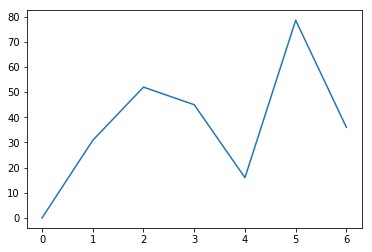

In [235]:
q = np.arange(nb_theta/2+1)
print(q)
plt.plot(r_q_pow*q**2)